### READ A FILE TEXT - EXTRACT AND PRINT THE PROPERTIES


In [5]:
with open('new.txt', 'r', encoding="utf-8") as f:

    raw_text = f.read()
    # TOTAL NUMBER OF CHARACTERS
    print(len(raw_text))
    # TOTAL NUMBER OF WORDS
    print(len(raw_text.split()))
    print(raw_text[:99])

21303
3798



I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was 


### SPLITTING BASED ON WHITESPACE


In [6]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [7]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [8]:
# REMOVE WHITE SPACE

result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [9]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [10]:
preprocessed = re.split(r'([,.?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(len(preprocessed))
print(preprocessed[:100])

4896
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '\\cb1', '\\', '\\cb3', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last']


In [11]:
all_words = sorted(list(set(preprocessed)))
vocab_size = len(all_words)
print(vocab_size)

1163


In [12]:
vocab = {token:integer for integer,token in enumerate(all_words)}
for i, item in enumerate(vocab.items()):
    print(item)
    if i > 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Carlo;', 25)
('Chicago', 26)
('Claude', 27)
('Come', 28)
('Croft', 29)
('Destroyed', 30)
('Devonshire', 31)
('Don', 32)
('Dubarry', 33)
('Emperors', 34)
('Florence', 35)
('For', 36)
('Gallery', 37)
('Gideon', 38)
('Gisburn', 39)
('Gisburns', 40)
('Grafton', 41)
('Greek', 42)
('Grindle', 43)
('Grindle:', 44)
('Grindles', 45)
('HAD', 46)
('Had', 47)
('Hang', 48)
('Has', 49)
('He', 50)
('Her', 51)


### TEXT TOKENIZER

In [13]:
import re

class SimpleTextTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab  # A
        self.int_to_str = {i: s for s, i in vocab.items()}  # B
        self.unk_token = '<UNK>' # UNK - UNKNOWN WORDS TO AVOID ERRORS
        if self.unk_token not in self.str_to_int:
            self.str_to_int[self.unk_token] = len(self.str_to_int) + 1
            self.int_to_str[self.str_to_int[self.unk_token]] = self.unk_token

    def encode(self, text):  # C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int.get(s, self.str_to_int[self.unk_token]) for s in preprocessed]
        return ids

    def decode(self, ids):  # D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)  # E
        return text


In [14]:
tokenizer = SimpleTextTokenizerV1(vocab)
text = "It's the last he painted, you know, Mrs. Gisburn said with pard"
ids = tokenizer.encode(text)
print(ids)


[58, 2, 875, 1016, 618, 544, 766, 5, 1158, 611, 5, 69, 7, 39, 876, 1139, 1164]


In [15]:
text = tokenizer.decode(ids)
print(text)

It' s the last he painted, you know, Mrs. Gisburn said with <UNK>


In [16]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))


1165


In [17]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('your', 1160)
('yourself', 1161)
('}', 1162)
('<|endoftext|>', 1163)
('<|unk|>', 1164)


### TOKENIZER TO HANDLE UNKNOWN WORDS

In [18]:
import re

class SimpleTextTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab  # A
        self.int_to_str = {i: s for s, i in vocab.items()}  # B
        self.unk_token = '<UNK>' # UNK - UNKNOWN WORDS TO AVOID ERRORS
        if self.unk_token not in self.str_to_int:
            self.str_to_int[self.unk_token] = len(self.str_to_int) + 1
            self.int_to_str[self.str_to_int[self.unk_token]] = self.unk_token

    def encode(self, text):  # C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int.get(s, self.str_to_int[self.unk_token]) for s in preprocessed]
        return ids

    def decode(self, ids):  # D
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)  # E
        return text


In [19]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))
print(text)


Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [20]:
tokenizer = SimpleTextTokenizerV1(vocab)
print(tokenizer.encode(text))

[1166, 5, 365, 1158, 645, 1003, 10, 1163, 57, 1016, 984, 1012, 741, 1016, 1166, 7]


In [21]:
print(tokenizer.decode(tokenizer.encode(text)))

<UNK>, do you like tea? <|endoftext|> In the sunlit terraces of the <UNK>.


In [22]:
from importlib.metadata import version

In [23]:
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.5.1


In [24]:
tokenizer = tiktoken.get_encoding("gpt2")

In [25]:
text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of som"
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 3870]


In [26]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of som


In [27]:
with open("NEW.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))


5640


In [28]:
enc_sample = enc_text[50:]

In [29]:
# PROCESSING INPUT TEXT WITH OUTPUT TEXT
context_size = 4 #A
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")

x: [27075, 11, 290, 4920]
y:      [11, 290, 4920, 2241]


In [30]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[27075] ----> 11
[27075, 11] ----> 290
[27075, 11, 290] ----> 4920
[27075, 11, 290, 4920] ----> 2241


In [31]:

for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 widow ----> ,
 widow, ---->  and
 widow, and ---->  established
 widow, and established ---->  himself


In [32]:
import torch
from torch.utils.data import Dataset, DataLoader
def __init__(self, txt, tokenizer, max_length, stride):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt) #A
        for i in range(0, len(token_ids) - max_length, stride): #B
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
def __len__(self): #C
        return len(self.input_ids)
def __getitem__(self, idx): #D
        return self.input_ids[idx], self.target_ids[idx]

In [33]:
def create_dataloader_v1(txt, batch_size=4,
    max_length=256, stride=128, shuffle=True, drop_last=True):
    tokenizer = tiktoken.get_encoding("gpt2") #A
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)
    return dataloader

In [34]:
def create_dataloader_v1(txt, batch_size=4,
        max_length=256, stride=128, shuffle=True, drop_last=True):
    tokenizer = tiktoken.get_encoding("gpt2") #A
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride) #B
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)
    return dataloader


In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.tokenizer = tokenizer
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt) #A
        for i in range(0, len(token_ids) - max_length, stride): #B
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    def __len__(self): #C
        return len(self.input_ids)
    def __getitem__(self, idx): #D
        return self.input_ids[idx], self.target_ids[idx]

### OUR TEXT ENCODING

In [36]:
with open("new.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader) #A
first_batch = next(data_iter)
print(first_batch)


[tensor([[628, 198,  40, 367]]), tensor([[ 198,   40,  367, 2885]])]


In [37]:
import torch
torch.manual_seed(123)

vocab_size = 100  
output_dim = 50

embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.3035,  ..., -0.5850,  0.8768,  1.6221],
        [-1.4779,  1.1331, -1.2203,  ..., -1.3193, -2.0915,  0.9629],
        [-0.0319, -0.4790,  0.7668,  ...,  0.9224,  0.2056, -0.4970],
        ...,
        [ 0.9662, -0.7323,  1.0804,  ..., -0.1578, -0.1673, -0.9981],
        [-0.2805,  0.8274, -0.3299,  ...,  0.9435,  1.0918,  1.0149],
        [-1.0725, -0.1296, -0.3116,  ..., -1.7791,  0.9917,  0.0354]],
       requires_grad=True)


In [38]:
# OUTPUT DIM - EMBEDDING VECTOR SIZE
# VOCAB SIZE - TOTAL NUMBER OF WORDS
output_dim = 256
vocab_size = 50257
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(token_embedding_layer)

Embedding(50257, 256)


In [39]:
max_length = 4
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=max_length, stride=max_length, shuffle=False )
data_iter = iter(dataloader)
inputs , targets = next(data_iter)
print("Token IDS",inputs)
print("TARGET IDS",targets)
print("INPUT SHAPE",inputs.shape)

# INPUT SHAPE FIRST NUMBER FROM BATCH SIZE


Token IDS tensor([[  628,   198,    40,   367],
        [ 2885,  1464,  1807,  3619],
        [  402,   271, 10899,  2138],
        [  257,  7026, 15632,   438],
        [ 2016,   257,   922,  5891],
        [ 1576,   438,   568,   340],
        [  373,   645,  1049,  5975],
        [  284,   502,   284,  3285]])
TARGET IDS tensor([[  198,    40,   367,  2885],
        [ 1464,  1807,  3619,   402],
        [  271, 10899,  2138,   257],
        [ 7026, 15632,   438,  2016],
        [  257,   922,  5891,  1576],
        [  438,   568,   340,   373],
        [  645,  1049,  5975,   284],
        [  502,   284,  3285,   326]])
INPUT SHAPE torch.Size([8, 4])


In [40]:
token_embeddings = token_embedding_layer(inputs)
print("EMBEDDING SHAPE", token_embeddings.shape)

EMBEDDING SHAPE torch.Size([8, 4, 256])


In [41]:

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [42]:
import torch

inputs = torch.tensor([
    [0.43, 0.15, 0.891],  # Your (x^1)
    [0.55, 0.87, 0.661],  # journey (x^2)
    [0.57, 0.85, 0.641],  # starts (x^3)
    [0.22, 0.58, 0.331],  # with (x^4)
    [0.77, 0.25, 0.10],   # one (x^5)
    [0.05, 0.80, 0.55]    # step (x^6)
])

print(inputs)


tensor([[0.4300, 0.1500, 0.8910],
        [0.5500, 0.8700, 0.6610],
        [0.5700, 0.8500, 0.6410],
        [0.2200, 0.5800, 0.3310],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


In [43]:
query = inputs[1]  #A
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

tensor([0.9560, 1.4963, 1.4767, 0.8444, 0.7071, 1.0871])


In [44]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())


Attention weights: tensor([0.1456, 0.2278, 0.2248, 0.1286, 0.1077, 0.1655])
Sum: tensor(1.0000)


In [45]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
 
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1386, 0.2380, 0.2333, 0.1240, 0.1081, 0.1580])
Sum: tensor(1.)


### CONTEXT VECTOR 


In [46]:
query = inputs[1] # 2nd input token is the query
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2_naive[i]*x_i
print(context_vec_2)


tensor([0.4419, 0.6515, 0.5691])


In [47]:
%time 
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)
print(attn_scores)


CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.1 μs
tensor([[1.0013, 0.9560, 0.9437, 0.4765, 0.4577, 0.6316],
        [0.9560, 1.4963, 1.4767, 0.8444, 0.7071, 1.0871],
        [0.9437, 1.4767, 1.4583, 0.8306, 0.7155, 1.0610],
        [0.4765, 0.8444, 0.8306, 0.4944, 0.3475, 0.6571],
        [0.4577, 0.7071, 0.7155, 0.3475, 0.6654, 0.2935],
        [0.6316, 1.0871, 1.0610, 0.6571, 0.2935, 0.9450]])


In [48]:
%time 
attn_scores = inputs @ inputs.T
print(attn_scores)


CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.15 μs
tensor([[1.0013, 0.9560, 0.9437, 0.4765, 0.4577, 0.6316],
        [0.9560, 1.4963, 1.4767, 0.8444, 0.7071, 1.0871],
        [0.9437, 1.4767, 1.4583, 0.8306, 0.7155, 1.0611],
        [0.4765, 0.8444, 0.8306, 0.4944, 0.3475, 0.6571],
        [0.4577, 0.7071, 0.7155, 0.3475, 0.6654, 0.2935],
        [0.6316, 1.0871, 1.0611, 0.6571, 0.2935, 0.9450]])


In [49]:
attn_weights = torch.softmax(attn_scores, dim=1)
print(attn_weights)

row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", attn_weights.sum(dim=1))

tensor([[0.2099, 0.2006, 0.1982, 0.1242, 0.1219, 0.1451],
        [0.1386, 0.2380, 0.2333, 0.1240, 0.1081, 0.1580],
        [0.1391, 0.2370, 0.2327, 0.1242, 0.1107, 0.1564],
        [0.1436, 0.2074, 0.2046, 0.1462, 0.1262, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1878, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1421, 0.0988, 0.1895]])
Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [50]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)


tensor([[0.4421, 0.5931, 0.5798],
        [0.4419, 0.6515, 0.5691],
        [0.4431, 0.6496, 0.5679],
        [0.4304, 0.6298, 0.5518],
        [0.4671, 0.5910, 0.5273],
        [0.4177, 0.6503, 0.5653]])


In [51]:
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C


In [52]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)


In [53]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4307, 1.4559])


In [54]:
keys = inputs @ W_key
values = inputs @ W_value
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [55]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)


tensor(1.8545)


In [56]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2723, 1.8545, 1.8132, 1.0813, 0.5580, 1.5448])


In [57]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)


tensor([0.1500, 0.2265, 0.2199, 0.1311, 0.0905, 0.1819])


In [58]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8545)


3.16 After computing the attention scores ω, the next step is to normalize these scores using the softmax function to obtain the attention weights α.

In [59]:
attn_scores_2 = query_2 @ keys.T # All attention scores for given query
print(attn_scores_2)

tensor([1.2723, 1.8545, 1.8132, 1.0813, 0.5580, 1.5448])


In [60]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)


tensor([0.3062, 0.8217])


### ATTENTION MECHANISM CLASS

In [61]:
import torch.nn as nn
class SelfAttention_v1(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # omega
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [62]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))


tensor([[0.2997, 0.8060],
        [0.3062, 0.8217],
        [0.3059, 0.8210],
        [0.2949, 0.7945],
        [0.2928, 0.7897],
        [0.2991, 0.8047]], grad_fn=<MmBackward0>)


### A self-attention class using PyTorch's Linear layers

In [63]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5,dim=-1)
        context_vec = attn_weights @ values
        return context_vec

In [64]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))


tensor([[-0.0740,  0.0712],
        [-0.0749,  0.0702],
        [-0.0750,  0.0701],
        [-0.0761,  0.0683],
        [-0.0765,  0.0678],
        [-0.0756,  0.0692]], grad_fn=<MmBackward0>)


### MASKED ATTENTION

In [65]:
queries = sa_v2.W_query(inputs)  #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1922, 0.1647, 0.1652, 0.1550, 0.1721, 0.1509],
        [0.2042, 0.1659, 0.1662, 0.1496, 0.1664, 0.1477],
        [0.2036, 0.1659, 0.1663, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1831, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1665, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [66]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)


tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [67]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[0.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2042, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1663, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1831, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1665, 0.1529]],
       grad_fn=<MulBackward0>)


In [68]:
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2759, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1970, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1665, 0.1529]],
       grad_fn=<DivBackward0>)


In [69]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)



tensor([[0.2904,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4663, 0.1727,   -inf,   -inf,   -inf,   -inf],
        [0.4601, 0.1708, 0.1735,   -inf,   -inf,   -inf],
        [0.2646, 0.1027, 0.1039, 0.0189,   -inf,   -inf],
        [0.2185, 0.0876, 0.0884, 0.0179, 0.0786,   -inf],
        [0.3411, 0.1274, 0.1294, 0.0201, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [70]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2759, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1970, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1665, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [71]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) #B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [72]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) #A


torch.Size([2, 6, 3])


### A compact causal attention class

In [73]:
import torch
import torch.nn as nn

class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super(CausalAttention, self).__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)  # Dropout layer
        
        # Register a buffer for the mask
        self.register_buffer(
            'mask',
            torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape  # Batch dimension b
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        # Compute attention scores
        attn_scores = queries @ keys.transpose(1, 2)
        
        # Apply mask to the attention scores
        attn_scores.masked_fill_(
            self.mask[:num_tokens, :num_tokens] == 1, float('-inf')
        )
        
        # Compute attention weights
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        # Compute the context vector
        context_vec = attn_weights @ values
        return context_vec

In [74]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [75]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length,
                 dropout, num_heads, qkv_bias=False):
        super(MultiHeadAttentionWrapper, self).__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )
        
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


In [76]:
context_length = batch.shape[1]  # This is the number of tokens
d_in, d_out = 3, 2
num_heads = 2  # Example number of heads

# Instantiate the MultiHeadAttentionWrapper class
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads)

# Get the context vectors
context_vecs = mha(batch)

# Print the context vectors and their shape
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.4774, 0.1063, 0.4568, 0.2731],
         [0.5893, 0.3256, 0.5794, 0.3013],
         [0.6205, 0.3859, 0.6251, 0.3104],
         [0.5480, 0.3589, 0.5693, 0.2788],
         [0.5323, 0.3427, 0.5545, 0.2521],
         [0.5078, 0.3493, 0.5339, 0.2501]],

        [[0.4774, 0.1063, 0.4568, 0.2731],
         [0.5893, 0.3256, 0.5794, 0.3013],
         [0.6205, 0.3859, 0.6251, 0.3104],
         [0.5480, 0.3589, 0.5693, 0.2788],
         [0.5323, 0.3427, 0.5545, 0.2521],
         [0.5078, 0.3493, 0.5339, 0.2501]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


### An efficient multi-head attention class

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)

        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1).bool())

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        attn_scores = queries @ keys.transpose(-2, -1) / self.head_dim**0.5

        mask_bool = self.mask[:num_tokens, :num_tokens]
        attn_scores.masked_fill_(mask_bool, float('-inf'))

        attn_weights = torch.softmax(attn_scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        context_vec = (attn_weights @ values).transpose(1, 2).contiguous()
        context_vec = context_vec.view(b, num_tokens, self.d_out)

        context_vec = self.out_proj(context_vec)
        return context_vec


In [78]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573], #A
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],
                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


## GPT 2 

In [79]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,  # Vocabulary size
    "context_length": 1024,      # Context length
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
# Embedding dimension
# Number of attention heads
# Number of layers
# Dropout rate
# Query-Key-Value bias
}

 A placeholder GPT model architecture class

In [80]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Define the layers within the transformer block here
        # For example, self.attention = nn.MultiheadAttention(...)
        # self.feed_forward = nn.Sequential(...)
        pass  # Replace with actual implementation
    
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = nn.LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, x):
        batch_size, seq_length = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits
    
    class DummyTransformerBlock(nn.Module): #C
        def __init__(self, cfg):
            super().__init__()
        def forward(self, x): #D
            return x
    class DummyLayerNorm(nn.Module): #E
        def __init__(self, normalized_shape, eps=1e-5): #F
            super().__init__()
        def forward(self, x):
            return x

TOKENIZATION


In [81]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [82]:
# AGAIN REDOING CODE
import torch
import torch.nn as nn
import torch.nn.functional as F

# Configuration for a dummy GPT model
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_layers": 12,
    "n_heads": 12,
    "drop_rate": 0.1
}

class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super(DummyTransformerBlock, self).__init__()
        self.ln1 = nn.LayerNorm(cfg["emb_dim"])
        self.attn = nn.MultiheadAttention(cfg["emb_dim"], cfg["n_heads"], dropout=cfg["drop_rate"])
        self.ln2 = nn.LayerNorm(cfg["emb_dim"])
        self.ff = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            nn.ReLU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
            nn.Dropout(cfg["drop_rate"]),
        )
    
    def forward(self, x):
        attn_output, _ = self.attn(x, x, x)
        x = x + attn_output
        x = self.ln1(x)
        ff_output = self.ff(x)
        x = x + ff_output
        x = self.ln2(x)
        return x

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super(DummyGPTModel, self).__init__()
        self.cfg = cfg
        self.token_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )
        
        self.final_norm = nn.LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
    
    def forward(self, x):
        batch_size, seq_length = x.shape
        pos = torch.arange(seq_length, device=x.device).unsqueeze(0).expand(batch_size, -1)
        
        token_emb = self.token_emb(x)
        pos_emb = self.pos_emb(pos)
        x = self.drop_emb(token_emb + pos_emb)
        
        x = x.permute(1, 0, 2)  # (seq_length, batch_size, emb_dim)
        x = self.trf_blocks(x)
        x = x.permute(1, 0, 2)  # (batch_size, seq_length, emb_dim)
        
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits



In [83]:
# IMPORTING 124 MILLION PARAMETERS MODEL
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
batch = torch.randint(0, GPT_CONFIG_124M["vocab_size"], (2, 20))  # (batch_size, seq_length)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)


Output shape: torch.Size([2, 20, 50257])
tensor([[[-1.3599, -1.2577, -0.6111,  ...,  0.0061,  0.0420, -1.0768],
         [-0.6184, -0.3793,  0.2606,  ..., -1.4515,  0.1570, -0.7658],
         [ 0.6675, -0.6125, -0.3853,  ..., -0.4462, -0.7583, -1.1308],
         ...,
         [-0.2660,  0.1238,  0.5709,  ..., -0.5192, -0.2916,  0.6920],
         [-0.9846, -0.1891, -0.2625,  ..., -0.0740, -0.4961, -0.1376],
         [-0.9344,  0.0295, -0.3976,  ..., -0.3331, -1.1134, -0.5943]],

        [[-0.7966, -0.4925,  0.2969,  ..., -0.6393, -0.1343, -1.1402],
         [-0.2599, -0.1856,  0.0412,  ...,  0.1443,  0.6179, -0.7266],
         [ 0.1892, -0.3393, -0.1118,  ..., -0.8784, -0.5399, -0.3858],
         ...,
         [-0.5847, -0.4795,  0.4931,  ..., -0.5003,  0.5226, -0.2928],
         [-0.4816, -0.0598, -1.0979,  ..., -0.3643, -0.6581, -0.0875],
         [ 0.0280,  0.2219, -0.5682,  ..., -0.3100,  0.1207, -0.4615]]],
       grad_fn=<UnsafeViewBackward0>)


In [84]:
# layer normalization

torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [85]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [86]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)


Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [87]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)


Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


### CLASS LAYER NORMALIZATION


In [88]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [89]:
# LayerNorm module in practice and apply it to the batch input:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)


Mean:
 tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [90]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


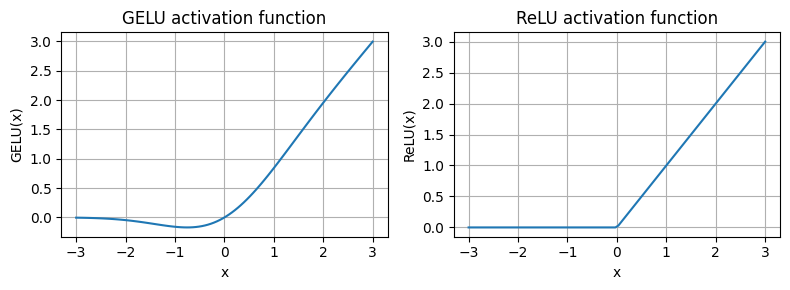

In [91]:
# PLOTING THE FUNCTIONS

import matplotlib.pyplot as plt
gelu, relu = GELU(), nn.ReLU()
x = torch.linspace(-3, 3, 100) #A
y_gelu, y_relu = gelu(x), relu(x)
plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# A feed forward neural network module

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
)
    def forward(self, x):
        return self.layers(x)

In [93]:
# FEED FORWARD NETWORK
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [94]:
# NN WITH SHORTCUT CONNECTION
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            # Implement 5 layers
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU()),
])
    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x


In [95]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for re
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)

In [96]:
#a function that computes the gradients in the the model's backward pass:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])
    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    # Backward pass to calculate the gradients
    loss.backward()
    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")


In [97]:
print_gradients(model_without_shortcut, sample_input)
# THE DECREASING IN GRADIENTS CALLED VANISHING GRADIENTS

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152039906941354
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [98]:
# MODEL WITH SKIP CONNECTIONS
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input)


layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576


# TRANSFORMER 

In [99]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, block_size, num_heads, dropout, qkv_bias):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim=d_in, num_heads=num_heads, dropout=dropout, bias=qkv_bias)
    def forward(self, x):
        x = x.permute(1, 0, 2)
        attn_output, _ = self.attention(x, x, x)
        return attn_output.permute(1, 0, 2)

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.fc1 = nn.Linear(cfg["emb_dim"], cfg["emb_dim"] * 4)
        self.fc2 = nn.Linear(cfg["emb_dim"] * 4, cfg["emb_dim"])
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(cfg["drop_rate"])
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.norm = nn.LayerNorm(emb_dim)
    def forward(self, x):
        return self.norm(x)

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            block_size=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_resid = nn.Dropout(cfg["drop_rate"])
    
    def forward(self, x):
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_resid(x)
        x = x + shortcut  # Add the original input back
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_resid(x)
        x = x + shortcut
        return x

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super(GPTModel, self).__init__()
        self.cfg = cfg
        self.token_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.blocks = nn.ModuleList([TransformerBlock(cfg) for _ in range(12)])  # Using 12 layers as an example
        self.ln_f = LayerNorm(cfg["emb_dim"])
        self.out_proj = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
        self.tie_weights()

    def tie_weights(self):
        self.out_proj.weight = self.token_emb.weight

    def forward(self, x):
        batch_size, seq_len = x.shape
        token_embeddings = self.token_emb(x)
        position_ids = torch.arange(seq_len, dtype=torch.long, device=x.device)
        position_embeddings = self.pos_emb(position_ids)
        x = token_embeddings + position_embeddings
        x = self.drop_emb(x)
        for block in self.blocks:
            x = block(x)
        x = self.ln_f(x)
        logits = self.out_proj(x)
        return logits
    
    def generate(self, idx, max_length, do_sample=True, top_k=50, temperature=0.7):
        self.eval()  # Ensure model is in evaluation mode
        with torch.no_grad():
            outputs = []
            current_token_ids = idx.clone()
            for _ in range(max_length):
                logits = self.forward(current_token_ids)
                if do_sample:
                    logits = logits[:, -1, :] / temperature
                    probs = torch.softmax(logits, dim=-1)
                    next_token = torch.multinomial(probs, num_samples=1)
                else:
                    next_token = torch.topk(logits[:, -1, :], k=top_k, dim=-1)
                    next_token = next_token.squeeze(1)

                outputs.append(next_token.item())
                # Ensure next_token is correctly shaped for concatenation
                next_token = next_token.unsqueeze(0)  # Add batch dimension
                current_token_ids = torch.cat([current_token_ids, next_token], dim=1)
        return current_token_ids



# Define the GPT configuration with the missing key included
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

torch.manual_seed(123)
x = torch.rand(2, 4, 768)  # Example input tensor
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


In [100]:
# # 4.5 Connecting attention and linear layers in a transformer block

# GPT_CONFIG_124M = {
#     "emb_dim": 768,
#     "context_length": 4,
#     "n_heads": 12,
#     "drop_rate": 0.1,
#     "qkv_bias": True,  # Ensure this key is included
#     # Include other necessary keys for the FeedForward module if any
# }

# class TransformerBlock(nn.Module):
#     def __init__(self, cfg):
#         super().__init__()
#         self.att = MultiHeadAttention(
#             d_in=cfg["emb_dim"],
#             d_out=cfg["emb_dim"],
#             block_size=cfg["context_length"],
#             num_heads=cfg["n_heads"],
#             dropout=cfg["drop_rate"],
#             qkv_bias=cfg["qkv_bias"])
#         self.ff = FeedForward(cfg)
#         self.norm1 = LayerNorm(cfg["emb_dim"])
#         self.norm2 = LayerNorm(cfg["emb_dim"])
#         self.drop_resid = nn.Dropout(cfg["drop_rate"])
#     def forward(self, x):
#         #A
#         shortcut = x
#         x = self.norm1(x)
#         x = self.att(x)
#         x = self.drop_resid(x)
#         x = x + shortcut  # Add the original input back
#         shortcut = x #B
#         x = self.norm2(x)
#         x = self.ff(x)
#         x = self.drop_resid(x)
#         x = x + shortcut  #C
#         return x

In [101]:
torch.manual_seed(123)
x = torch.rand(2, 4, 768)  # Example input tensor
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)

Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])


In [102]:
# The GPT model architecture implementation

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [103]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[25371, 42188, 47556,  8856, 13224, 29264, 30628,  7204, 34725, 39523,
         44813,  1115, 28954, 44349, 34500,  8399,  9783, 15353, 30529, 22184],
        [16499, 30185,  1259, 35534, 46286, 38674, 39569, 36623, 18047,  6669,
         13955, 46877, 48518, 48812, 34325, 42640, 42819, 34347, 27687, 50069]])

Output shape: torch.Size([2, 20, 50257])
tensor([[[-1.0871, -0.2160, -0.1754,  ..., -0.2219, -0.8070, -0.4957],
         [-0.7125,  0.2712, -0.5051,  ..., -0.0540, -0.8916, -0.0825],
         [-0.1383,  0.0270, -0.1756,  ...,  0.1413,  0.3794, -0.1628],
         ...,
         [-1.5354,  0.6456,  1.1948,  ...,  0.9305, -0.2489,  0.8868],
         [ 0.3126,  0.0398, -0.0674,  ..., -0.6247,  0.0696,  1.4717],
         [-0.5091,  0.8648, -0.8332,  ...,  0.1936,  0.3052,  0.2909]],

        [[-1.8764,  0.0362, -0.4020,  ...,  0.6799,  0.0400, -0.4855],
         [-1.1981,  0.3524, -0.9005,  ..., -0.4203, -0.2029,  0.8310],
         [-0.2131,  0.0675, -0.5268,  ...

In [104]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,000,320


In [105]:
# The token embedding and output layers are very large due to the number of rows for the 50,257 in the
#  tokenizer's vocabulary. Let's remove the output layer parameter count from the total GPT-2 model 
# count according to the weight tying:

total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")
# Since weights are tied, we count the token embedding parameters only once
# total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)





Total number of parameters: 163,000,320
Total number of parameters: 163,000,320
Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [106]:
total_size_bytes = total_params * 4  #A
total_size_mb = total_size_bytes / (1024 * 1024)  #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.80 MB


In [107]:
def generate_text_simple(model, idx, max_new_tokens, context_size): #A
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:] #B
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :] #C
        probas = torch.softmax(logits, dim=-1)  #D
        idx_next = torch.argmax(probas, dim=-1, keepdim=True) #E
        idx = torch.cat((idx, idx_next), dim=1)  #F
    return idx

In [108]:
#  TEXT GENERATING

start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0) #A
print("encoded_tensor.shape:", encoded_tensor.shape)



encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [109]:
# EVALUATING THE GENERATED TEXT
model.eval() #A
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716,  6464,  2299,  4695,  2583, 16896, 29091]])
Output length: 10


In [110]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)


Hello, I am receiving compl animals host cried vitamins


In [111]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,  #A
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,     #B
    "qkv_bias": False
}
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [112]:
import tiktoken
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimensi
    return encoded_tensor
def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["context_length"])
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Clock aligned cess predators internationally Fisheries piles someone precipitationbsp


In [113]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]


In [114]:
# targets are the inputs but shifted one position forward, a concept
targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [588,  428,  11311]]) #  " really like chocolate"]


In [115]:
# feed the inputs into the model to calculate logit vectors for the two input examples, 
# each comprising three tokens, and apply the softmax function to transform these logit values into probability scores
with torch.no_grad(): #A
    logits = model(inputs)
probas = torch.softmax(logits, dim=-1) # Probability of each token in vocab
print(probas.shape)

# OUTPUT - FIRST : 2 EXAMPLE IN THE INPUT BATCH , 2 : 3 NUMBER OF TOKENS IN EACH EXAMPLE, 3 : 50257 NUMBER OF TOKENS IN VOCAB

torch.Size([2, 3, 50257])


In [116]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[ 8102],
         [  351],
         [39178]],

        [[19646],
         [16501],
         [38197]]])


In [117]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")


Targets batch 1:  effort moves you
Outputs batch 1: abis with loopholes


In [118]:
# For each of the two input texts, we can print the initial softmax probability scores corresponding 
# to the target tokens via the following code:

text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
 
print("Text 1:", target_probas_1)
text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)


Text 1: tensor([8.1353e-06, 6.1600e-05, 3.7829e-05])
Text 2: tensor([1.1551e-05, 7.0061e-06, 2.9883e-05])


In [119]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)


tensor([-11.7193,  -9.6948, -10.1824, -11.3688, -11.8687, -10.4182])


In [120]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)


tensor(-10.8754)


In [121]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.8754)


In [122]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)


Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [123]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()
print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)


Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [124]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)


tensor(10.8754)


In [125]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)


tensor(10.8754)


In [126]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)


Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [127]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()
print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)


Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [128]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.8754)


In [129]:
perplexity = torch.exp(loss)
print(perplexity)

tensor(52858.9062)


In [130]:
file_path = "new.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [131]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 21303
Tokens: 5640


In [132]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [133]:
torch.manual_seed(123)
train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True
)
val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False
)

In [134]:
# we can iterate through the data loaders to ensure that they were created correctly:

print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)
print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


In [135]:
# UTILITY FUNCTION TO CALCULATE CROSS ENTROPY FUNCTION FOR THE MODEL
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)

    loss = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1), target_batch.flatten()
    )
    return loss


In [136]:
# FUNCTION TO COMPUTE THE TRAINING AND VALIDATION LOSS
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if num_batches is None:
        num_batches = len(data_loader) #A
    else:
        num_batches = min(num_batches, len(data_loader)) #B
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item() #C
        else:
            break
    return total_loss / num_batches #D


In [137]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #A
model.to(device)
train_loss = calc_loss_loader(train_loader, model, device) #B
val_loss = calc_loss_loader(val_loader, model, device)
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.954476144578722
Validation loss: 10.97632122039795


### TRAINING THE MODEL

In [138]:
def train_model_simple(model, train_loader, val_loader, optimizer, device,
                       eval_freq, eval_iter, start_context, num_epochs):
    train_losses, val_losses, track_tokens_seen = [], [], [] #A
    tokens_seen, global_step = 0, -1
    for epoch in range(num_epochs): #B
        model.train()
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() #C
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() #D
            optimizer.step() #E
            tokens_seen += input_batch.numel()
            global_step += 1
            if global_step % eval_freq == 0: #F
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")
        generate_and_print_sample(  #G
            model, train_loader.dataset.tokenizer, device, start_context
        )
    return train_losses, val_losses, track_tokens_seen


In [139]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval() #A
    with torch.no_grad(): #B
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=4)
    model.train()
    return train_loss, val_loss


In [140]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
        decoded_text = token_ids_to_text(token_ids, tokenizer)
        print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()


In [141]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=1,
    start_context="Every effort moves you"
)


Ep 1 (Step 000000): Train loss 9.189, Val loss 9.860
Ep 1 (Step 000005): Train loss 7.810, Val loss 8.172
Every effort moves you the,,,, the, the,,,,,,, the,, the,,, the,,, the,,,,,,,,,,,,,,,, the,,,,,,
Ep 2 (Step 000010): Train loss 6.256, Val loss 6.810
Ep 2 (Step 000015): Train loss 5.794, Val loss 6.319
Every effort moves you I of the, I of the I.\cb1 \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ \
Ep 3 (Step 000020): Train loss 5.378, Val loss 6.158
Ep 3 (Step 000025): Train loss 5.409, Val loss 6.021
Every effort moves you3 "I, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and, and the, and of the, and
Ep 4 (Step 000030): Train loss 4.579, Val loss 6.016
Ep 4 (Step 000035): Train loss 4.023, Val loss 5.956
Every effort moves you of the "I I had been his pictures of the "I of the of the, and I was of the \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ \cb1 \ 
Ep 5 (Step 000040): Train loss 4.321, Val loss 5.873
Every effort moves you know of Jack's I

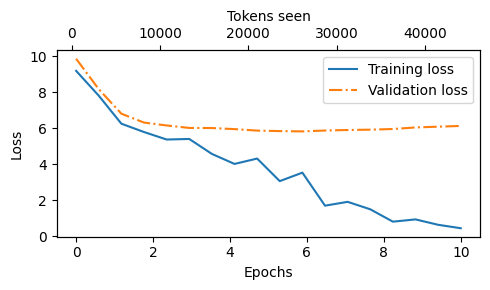

In [142]:
import matplotlib.pyplot as plt
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")  # Fix: Proper indentation
    ax1.legend(loc="upper right")
    ax2 = ax1.twiny()  #A
    ax2.plot(tokens_seen, train_losses, alpha=0)  #B
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)


In [143]:
model.to("cpu")
model.eval()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [144]:
tokenizer = tiktoken.get_encoding("gpt2")
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you with boyfriend", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you with boyfriend I found the couple at tea beneath their palm-trees; and Mrs. Gisburn's welcome was so genial


In [145]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}
inverse_vocab = {v: k for k, v in vocab.items()}

In [146]:
next_token_logits = torch.tensor(
    [4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [147]:
# we convert the logits into probabilities via the softmax function and obtain the token ID corresponding the generated token via the 
# argmax function, which we can then map back into text via the inverse vocabulary:

probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id])

forward


In [148]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])


forward


In [149]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(10)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")
print_sampled_tokens(probas)

0 x closer
0 x every
0 x effort
5 x forward
0 x inches
0 x moves
0 x pizza
5 x toward


In [150]:
# As we can see based on the output, the word "forward" is sampled most of the time 
# (582 out of 1000 times), but other tokens such as "closer", "inches", and "toward" will also be sampled
#  some of the time. This means that if we replaced the argmax function with the multinomial function inside
#  the generate_and_print_sample function, the LLM would sometimes generatetextssuchas"every effort moves you toward",
# "every effort moves you inches",
# and"every effort moves you closer"insteadof "every effort moves you forward".

In [151]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)


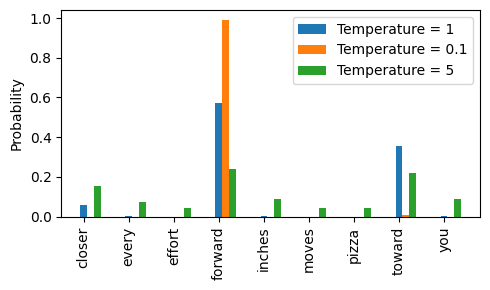

In [152]:
temperatures = [1, 0.1, 5]  # Original, higher, and lower temperature
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]
x = torch.arange(len(vocab))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i],
                   bar_width, label=f'Temperature = {T}')
ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()
plt.tight_layout()
plt.show()


In [153]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, top_k)
 
print("Top logits:", top_logits)
print("Top positions:", top_pos)


Top logits: tensor([6.7500, 6.2800, 4.5100])
Top positions: tensor([3, 7, 0])


In [154]:
new_logits = torch.where(
    condition=next_token_logits < top_logits[-1],  #A
    input=torch.tensor(float('-inf')),  #B
    other=next_token_logits  #C
)
print(new_logits)

tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [155]:
topk_probas = torch.softmax(new_logits, dim=0)
print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


# 5.3.3 Modifying the text generation function

In [156]:
def generate(model, idx, max_new_tokens, context_size, temperature, top_k=None):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]
        if top_k is not None:
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(
                logits < min_val,
                torch.tensor(float('-inf')).to(logits.device),
                logits
            )
        if temperature > 0.0:
            logits = logits / temperature
            probs = torch.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)
    return idx


In [157]:
torch.manual_seed(123)
token_ids = generate(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=15,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you an object for garlands ever knew." to have dis! The women had


In [158]:
# 5.4 Loading and saving model weights in PyTorch

torch.save(model.state_dict(), "model.pth")

In [159]:

model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth"))
model.eval()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [160]:
torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    },
    "model_and_optimizer.pth"
)


In [161]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [162]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

In [163]:
from gpt_download import download_and_load_gpt2
# We can then download the model weights for the 124 million parameter model as follows:
settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")


File already exists and is up-to-date: gpt2/124M/checkpoint
File already exists and is up-to-date: gpt2/124M/encoder.json
File already exists and is up-to-date: gpt2/124M/hparams.json
File already exists and is up-to-date: gpt2/124M/model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2/124M/model.ckpt.index
File already exists and is up-to-date: gpt2/124M/model.ckpt.meta
File already exists and is up-to-date: gpt2/124M/vocab.bpe


In [164]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())


Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [165]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})

gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [166]:
model_name = "gpt2-small (124M)"
print(f"Model name: {model_name}")
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])

Model name: gpt2-small (124M)


In [167]:
NEW_CONFIG.update({"context_length": 1024})

In [168]:
NEW_CONFIG.update({"qkv_bias": True})

In [169]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


In [187]:
gpt = GPTModel(NEW_CONFIG)
gpt.eval()


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [188]:
# TO CHECK LEFT AND RIGHT TENSOR DIAMENSIONS ARE SME
# def assign(left, right):
#     if left.shape != right.shape:
#         raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right}")
#     return torch.nn.Parameter(torch.tensor(right))

def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right).clone().detach()) # Changed

In [189]:
def get_requirements_dict():
    return {
        'numpy': '1.26.0',
        'matplotlib': '3.8.2',
        'jupyterlab': '4.0.6',
        'tensorflow': '2.15.0',
        'torch': '2.2.1',
        'tqdm': '4.66.1',
        'tiktoken': '0.5.1'
    }


In [190]:
import pkg_resources

def verify_installed_packages(requirements_dict):
    installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    missing_packages = []

    for package, required_version in requirements_dict.items():
        if package not in installed_packages:
            missing_packages.append(package)
    
    if missing_packages:
        print("The following packages need to be installed:")
        for package in missing_packages:
            print(package)
    else:
        print("All required packages are already installed.")

# Main script execution
if __name__ == "__main__":
    d = get_requirements_dict()
    verify_installed_packages(d)

All required packages are already installed.


In [191]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 256,  # Adjusted context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [195]:
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])
# NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})

gpt = GPTModel(NEW_CONFIG)
gpt.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=False)
        )
      )
      (ff): FeedForward(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (relu): ReLU()
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (norm1): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (norm2): LayerNorm(
        (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      )
      (drop_resid): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (attention): MultiheadAttention(
          (out_proj): 

In [196]:
def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

In [200]:
import numpy as np
import torch

def assign(old_weights, new_weights):
    # Assuming old_weights is a PyTorch Parameter
    old_weights.data = torch.from_numpy(new_weights)
    return old_weights

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.attention.in_proj_weight = assign(
            gpt.trf_blocks[b].att.attention.in_proj_weight, 
            np.concatenate([q_w.T, k_w.T, v_w.T], axis=0))

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.attention.in_proj_bias = assign(
            gpt.trf_blocks[b].att.attention.in_proj_bias, 
            np.concatenate([q_b, k_b, v_b], axis=0))

        gpt.trf_blocks[b].att.attention.out_proj.weight = assign(
            gpt.trf_blocks[b].att.attention.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.attention.out_proj.bias = assign(
            gpt.trf_blocks[b].att.attention.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.fc1.weight = assign(
            gpt.trf_blocks[b].ff.fc1.weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.fc1.bias = assign(
            gpt.trf_blocks[b].ff.fc1.bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.fc2.weight = assign(
            gpt.trf_blocks[b].ff.fc2.weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.fc2.bias = assign(
            gpt.trf_blocks[b].ff.fc2.bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.norm.weight = assign(
            gpt.trf_blocks[b].norm1.norm.weight, 
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.norm.bias = assign(
            gpt.trf_blocks[b].norm1.norm.bias, 
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.norm.weight = assign(
            gpt.trf_blocks[b].norm2.norm.weight, 
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.norm.bias = assign(
            gpt.trf_blocks[b].norm2.norm.bias, 
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.norm.weight = assign(gpt.final_norm.norm.weight, params["g"])
    gpt.final_norm.norm.bias = assign(gpt.final_norm.norm.bias, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

# Example parameters for testing
params = {
    "wpe": np.random.rand(GPT_CONFIG_124M["context_length"], GPT_CONFIG_124M["emb_dim"]),
    "wte": np.random.rand(GPT_CONFIG_124M["vocab_size"], GPT_CONFIG_124M["emb_dim"]),
    "blocks": [{
        "attn": {
            "c_attn": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"] * 3),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 3)},
            "c_proj": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"]),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
        },
        "mlp": {
            "c_fc": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 4, GPT_CONFIG_124M["emb_dim"]),
                     "b": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 4)},
            "c_proj": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"] * 4),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
        },
        "ln_1": {"g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
                 "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])},
        "ln_2": {"g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
                 "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
    } for _ in range(GPT_CONFIG_124M["n_layers"])],
    "g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
    "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])
}

# Initialize the model
gpt = GPTModel(GPT_CONFIG_124M)
load_weights_into_gpt(gpt, params)
gpt.to('cpu')


AttributeError: 'NoneType' object has no attribute 'data'

In [201]:
import torch
import torch.nn as nn
import numpy as np

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, block_size, num_heads, dropout, qkv_bias):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim=d_in, num_heads=num_heads, dropout=dropout, bias=qkv_bias)
    def forward(self, x):
        x = x.permute(1, 0, 2)
        attn_output, _ = self.attention(x, x, x)
        return attn_output.permute(1, 0, 2)

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.fc1 = nn.Linear(cfg["emb_dim"], cfg["emb_dim"] * 4)
        self.fc2 = nn.Linear(cfg["emb_dim"] * 4, cfg["emb_dim"])
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(cfg["drop_rate"])
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.norm = nn.LayerNorm(emb_dim)
    def forward(self, x):
        return self.norm(x)

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            block_size=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"]
        )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_resid = nn.Dropout(cfg["drop_rate"])
    
    def forward(self, x):
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)
        x = self.drop_resid(x)
        x = x + shortcut  # Add the original input back
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_resid(x)
        x = x + shortcut
        return x

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super(GPTModel, self).__init__()
        self.cfg = cfg
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.ModuleList([TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

def assign(old_weights, new_weights):
    old_weights.data = torch.from_numpy(new_weights)
    return old_weights

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.attention.in_proj_weight = assign(
            gpt.trf_blocks[b].att.attention.in_proj_weight, 
            np.concatenate([q_w.T, k_w.T, v_w.T], axis=0))

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.attention.in_proj_bias = assign(
            gpt.trf_blocks[b].att.attention.in_proj_bias, 
            np.concatenate([q_b, k_b, v_b], axis=0))

        gpt.trf_blocks[b].att.attention.out_proj.weight = assign(
            gpt.trf_blocks[b].att.attention.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.attention.out_proj.bias = assign(
            gpt.trf_blocks[b].att.attention.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.fc1.weight = assign(
            gpt.trf_blocks[b].ff.fc1.weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.fc1.bias = assign(
            gpt.trf_blocks[b].ff.fc1.bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.fc2.weight = assign(
            gpt.trf_blocks[b].ff.fc2.weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.fc2.bias = assign(
            gpt.trf_blocks[b].ff.fc2.bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.norm.weight = assign(
            gpt.trf_blocks[b].norm1.norm.weight, 
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.norm.bias = assign(
            gpt.trf_blocks[b].norm1.norm.bias, 
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.norm.weight = assign(
            gpt.trf_blocks[b].norm2.norm.weight, 
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.norm.bias = assign(
            gpt.trf_blocks[b].norm2.norm.bias, 
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.norm.weight = assign(gpt.final_norm.norm.weight, params["g"])
    gpt.final_norm.norm.bias = assign(gpt.final_norm.norm.bias, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])

# Example parameters for testing
params = {
    "wpe": np.random.rand(GPT_CONFIG_124M["context_length"], GPT_CONFIG_124M["emb_dim"]),
    "wte": np.random.rand(GPT_CONFIG_124M["vocab_size"], GPT_CONFIG_124M["emb_dim"]),
    "blocks": [{
        "attn": {
            "c_attn": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"] * 3),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 3)},
            "c_proj": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"]),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
        },
        "mlp": {
            "c_fc": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 4, GPT_CONFIG_124M["emb_dim"]),
                     "b": np.random.rand(GPT_CONFIG_124M["emb_dim"] * 4)},
            "c_proj": {"w": np.random.rand(GPT_CONFIG_124M["emb_dim"], GPT_CONFIG_124M["emb_dim"] * 4),
                       "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
        },
        "ln_1": {"g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
                 "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])},
        "ln_2": {"g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
                 "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])}
    } for _ in range(GPT_CONFIG_124M["n_layers"])],
    "g": np.random.rand(GPT_CONFIG_124M["emb_dim"]),
    "b": np.random.rand(GPT_CONFIG_124M["emb_dim"])
}

# Initialize the model
gpt = GPTModel(GPT_CONFIG_124M)
load_weights_into_gpt(gpt, params)
gpt.to('cpu')


AttributeError: 'NoneType' object has no attribute 'data'

In [ ]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("Every effort will se", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort will seChinese skate PatientcomfortLeg Diseases� sermonс hyster Lower758 mechanical deliversсiners pa neoliberal fishesс unethical accurately 777 accurately Schultz


2
